# **Created by**
*   6209610077
*   6209610234
*   6209610358

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing all the needed libraries
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
#from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
%matplotlib inline
dataset = pd.read_csv("/content/drive/My Drive/Classroom/CS245_63-1 870001_650001/data/heart.csv")
# cp = chest pain
# trestbps = resting blood pressure
# chol = cholesterol
# restecg = number of result of ecg
# thalach = max heart rate
# exang = work out util recived angina
# oldpeak = restless and work out and cause ST depression
#data = np.isnan(dataset)
#print(data.sum())
#print("if sum of all data = 0 -> no NAN data.")

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("/content/drive/My Drive/Classroom/CS245_63-1 870001_650001/data/heart.csv")
column_name = 'age'
col = np.array(dataset[column_name])
print(col)

[63 37 41 56 57 57 56 44 52 57 54 48 49 64 58 50 58 66 43 69 59 44 42 61
 40 71 59 51 65 53 41 65 44 54 51 46 54 54 65 65 51 48 45 53 39 52 44 47
 53 53 51 66 62 44 63 52 48 45 34 57 71 54 52 41 58 35 51 45 44 62 54 51
 29 51 43 55 51 59 52 58 41 45 60 52 42 67 68 46 54 58 48 57 52 54 45 53
 62 52 43 53 42 59 63 42 50 68 69 45 50 50 64 57 64 43 55 37 41 56 46 46
 64 59 41 54 39 34 47 67 52 74 54 49 42 41 41 49 60 62 57 64 51 43 42 67
 76 70 44 60 44 42 66 71 64 66 39 58 47 35 58 56 56 55 41 38 38 67 67 62
 63 53 56 48 58 58 60 40 60 64 43 57 55 65 61 58 50 44 60 54 50 41 51 58
 54 60 60 59 46 67 62 65 44 60 58 68 62 52 59 60 49 59 57 61 39 61 56 43
 62 63 65 48 63 55 65 56 54 70 62 35 59 64 47 57 55 64 70 51 58 60 77 35
 70 59 64 57 56 48 56 66 54 69 51 43 62 67 59 45 58 50 62 38 66 52 53 63
 54 66 55 49 54 56 46 61 67 58 47 52 58 57 58 61 42 52 59 40 61 46 59 57
 57 55 61 58 58 67 44 63 63 59 57 45 68 57 57]


แสดงค่าสถิติและคุณลักษณธเบื้องต้น โดย เซ็ตข้อมูลนี้ ประกอบด้วย 303 rows และ 12 columns

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Drop columns : thal , ca and slope -> not use
dataset = dataset.drop(['thal'],axis=1)
dataset = dataset.drop(['ca'],axis=1)
dataset = dataset.drop(['slope'],axis=1)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,0
299,45,1,3,110,264,0,1,132,0,1.2,0
300,68,1,0,144,193,1,1,141,0,3.4,0
301,57,1,0,130,131,0,1,115,1,1.2,0


ทำ  Data preparation โดยการ Handing Missing Data เพื่อตรวจสอบว่าในเซ็ตข้อมูลมี missing value หรือไม่ จึงได้ผลลัพธ์ออกมาว่า เซ็ตข้อมูลนี้ไม่มีค่า missing value เนื่องจากทำการ นำแต่ละข้อมูลของทุกแถวมาบวกกันให้ครบทุกค่า แล้วได้ค่าออกมาเท่ากับ 0 

In [ ]:
# Data preparation
# Check for NAN value.
data = np.isnan(dataset)
data = pd.DataFrame(data)
print('Check for NAN values.\n')
print(data)
print()
print(data.sum())
print()
print('Thus, this data set have no NAN values.')

Check for NAN values.

       age    sex     cp  trestbps  ...  thalach  exang  oldpeak  target
0    False  False  False     False  ...    False  False    False   False
1    False  False  False     False  ...    False  False    False   False
2    False  False  False     False  ...    False  False    False   False
3    False  False  False     False  ...    False  False    False   False
4    False  False  False     False  ...    False  False    False   False
..     ...    ...    ...       ...  ...      ...    ...      ...     ...
298  False  False  False     False  ...    False  False    False   False
299  False  False  False     False  ...    False  False    False   False
300  False  False  False     False  ...    False  False    False   False
301  False  False  False     False  ...    False  False    False   False
302  False  False  False     False  ...    False  False    False   False

[303 rows x 11 columns]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs  

ทำการเปลี่ยนชื่อของ columns เพื่อให้สะดวกต่อการใช้งาน

In [ ]:
#change columns name
print('Change columns name.')
dataset.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ECG','max_hr','exercise_induced_angina','st_depression','heart_disease']
print(dataset)

Change columns name.
     age  sex  ...  st_depression  heart_disease
0     63    1  ...            2.3              1
1     37    1  ...            3.5              1
2     41    0  ...            1.4              1
3     56    1  ...            0.8              1
4     57    0  ...            0.6              1
..   ...  ...  ...            ...            ...
298   57    0  ...            0.2              0
299   45    1  ...            1.2              0
300   68    1  ...            3.4              0
301   57    1  ...            1.2              0
302   57    0  ...            0.0              0

[303 rows x 11 columns]


ทำการเปลี่ยนค่าเพื่อให้ชัดเจนมากขึ้นทำให้สะดวกต่อการทำความเข้าใจ

In [ ]:
#change values to be more specific.
#newdataset['Species'] = newdataset.Species.map({'Iris-setosa':1, 'Iris-versicolor': 2, 'Iris-virginica': 3})
dataset['sex'][dataset['sex'] == 0] = 'female'
dataset['sex'][dataset['sex'] == 1] = 'male'

dataset['chest_pain_type'][dataset['chest_pain_type'] == 0] = 'typical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 1] = 'atypical angina'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 2] = 'non-anginal pain'
dataset['chest_pain_type'][dataset['chest_pain_type'] == 3] = 'asymptomatic'

dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 0] = 'less than 120mg/dl'
dataset['fasting_blood_sugar'][dataset['fasting_blood_sugar'] == 1] = 'more than 120mg/dl'

dataset['exercise_induced_angina'][dataset['exercise_induced_angina']==0] = 'no'
dataset['exercise_induced_angina'][dataset['exercise_induced_angina']==1] = 'yes'

dataset['rest_ECG'][dataset['rest_ECG']==0] = 'normal'
dataset['rest_ECG'][dataset['rest_ECG']==1] = 'ST-T wave abnormality'
dataset['rest_ECG'][dataset['rest_ECG']==2] = 'left ventricular hypertrophy'

dataset['heart_disease'][dataset['heart_disease']==0] = 'no'
dataset['heart_disease'][dataset['heart_disease']==1] = 'yes'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_la

In [ ]:
dataset.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ECG,max_hr,exercise_induced_angina,st_depression,heart_disease
0,63,male,asymptomatic,145,233,more than 120mg/dl,normal,150,no,2.3,yes
1,37,male,non-anginal pain,130,250,less than 120mg/dl,ST-T wave abnormality,187,no,3.5,yes
2,41,female,atypical angina,130,204,less than 120mg/dl,normal,172,no,1.4,yes
3,56,male,atypical angina,120,236,less than 120mg/dl,ST-T wave abnormality,178,no,0.8,yes
4,57,female,typical angina,120,354,less than 120mg/dl,ST-T wave abnormality,163,yes,0.6,yes


ทำการ groupby เพื่อแยกแต่ละประเภทเเล้วแสดงจำนวนข้อมูลในแต่ละประเภทว่ามีจำนวนเท่าไร เพื่อนำไปวิเคราะห์

In [ ]:
dataset.groupby('sex').size()

sex
female     96
male      207
dtype: int64

In [ ]:
dataset.groupby('chest_pain_type').size()

chest_pain_type
asymptomatic         23
atypical angina      50
non-anginal pain     87
typical angina      143
dtype: int64

In [ ]:
dataset.groupby('fasting_blood_sugar').size()

fasting_blood_sugar
less than 120mg/dl    258
more than 120mg/dl     45
dtype: int64

In [ ]:
dataset.groupby('rest_ECG').size()

rest_ECG
ST-T wave abnormality           152
left ventricular hypertrophy      4
normal                          147
dtype: int64

In [ ]:
dataset.groupby('exercise_induced_angina').size()

exercise_induced_angina
no     204
yes     99
dtype: int64

ทำการใช้ Statistics of data เพื่อหาค่าเฉลี่ย ค่าสูงสุดสุด ค่าต่ำสุด ของข้อมูล

In [ ]:
# Statistics of data
print('The average of all data:')
# Mean
print()
print('Mean heart rate : ',dataset['age'].mean())
print('Mean resting blood pressure : ',dataset['resting_blood_pressure'].mean())
print('Mean serum cholesterol : ',dataset['cholesterol'].mean())
print('Mean heart rate : ',dataset['max_hr'].mean())
print('Mean ST Depression : ',dataset['st_depression'].mean())
print()
print('The maximum values of all data:')
# Max
print()
print('Max heart rate : ',dataset['age'].max())
print('Max resting blood pressure : ',dataset['resting_blood_pressure'].max())
print('Max serum cholesterol : ',dataset['cholesterol'].max())
print('Max heart rate : ',dataset['max_hr'].max())
print('Max ST Depression : ',dataset['st_depression'].max())
print()
print('The minimum values of all data:')
# Min
print()
print('Min heart rate : ',dataset['age'].min())
print('Min resting blood pressure : ',dataset['resting_blood_pressure'].min())
print('Min serum cholesterol : ',dataset['cholesterol'].min())
print('Min heart rate : ',dataset['max_hr'].min())
print('Min ST Depression : ',dataset['st_depression'].min())

The average of all data:

Mean heart rate :  54.366336633663366
Mean resting blood pressure :  131.62376237623764
Mean serum cholesterol :  246.26402640264027
Mean heart rate :  149.64686468646866
Mean ST Depression :  1.0396039603960396

The maximum values of all data:

Max heart rate :  77
Max resting blood pressure :  200
Max serum cholesterol :  564
Max heart rate :  202
Max ST Depression :  6.2

The minimum values of all data:

Min heart rate :  29
Min resting blood pressure :  94
Min serum cholesterol :  126
Min heart rate :  71
Min ST Depression :  0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    object 
 2   chest_pain_type          303 non-null    object 
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    object 
 6   rest_ECG                 303 non-null    object 
 7   max_hr                   303 non-null    int64  
 8   exercise_induced_angina  303 non-null    object 
 9   st_depression            303 non-null    float64
 10  heart_disease            303 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 26.2+ KB


ใช้เพื่อ อธิบายค่าเฉลี่ย ส่วนเบี่ยงเบนมาตรฐาน ค่าต่ำสุด percentile ที่ 25 , 50 , 75 เเละค่าสูงสุด

In [ ]:
dataset.describe()

,age,resting_blood_pressure,cholesterol,max_hr,st_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


ทำการสร้าง data set ที่ชื่อว่า heart สำหรับเก็บข้อมูลเฉพาะผู้ป่วยที่เป็นโรคหัวใจ

In [ ]:
# create a data set that store only patient who got heart disease
heart = dataset[dataset['heart_disease']=='yes']
heart = pd.DataFrame(heart)
heart

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ECG,max_hr,exercise_induced_angina,st_depression,heart_disease
0,63,male,asymptomatic,145,233,more than 120mg/dl,normal,150,no,2.3,yes
1,37,male,non-anginal pain,130,250,less than 120mg/dl,ST-T wave abnormality,187,no,3.5,yes
2,41,female,atypical angina,130,204,less than 120mg/dl,normal,172,no,1.4,yes
3,56,male,atypical angina,120,236,less than 120mg/dl,ST-T wave abnormality,178,no,0.8,yes
4,57,female,typical angina,120,354,less than 120mg/dl,ST-T wave abnormality,163,yes,0.6,yes
...,...,...,...,...,...,...,...,...,...,...,...
160,56,male,atypical angina,120,240,less than 120mg/dl,ST-T wave abnormality,169,no,0.0,yes
161,55,female,atypical angina,132,342,less than 120mg/dl,ST-T wave abnormality,166,no,1.2,yes
162,41,male,atypical angina,120,157,less than 120mg/dl,ST-T wave abnormality,182,no,0.0,yes
163,38,male,non-anginal pain,138,175,less than 120mg/dl,ST-T wave abnormality,173,no,0.0,yes


In [ ]:
# Max
print('Maximum values of Heart disease patients.')
print('Max heart rate : ',heart['age'].max())
print('Max resting blood pressure : ',heart['resting_blood_pressure'].max())
print('Max serum cholesterol : ',heart['cholesterol'].max())
print('Max heart rate : ',heart['max_hr'].max())
print('Max ST Depression : ',heart['st_depression'].max())

Max heart rate :  76
Max resting blood pressure :  180
Max serum cholesterol :  564
Max heart rate :  202
Max ST Depression :  4.2


In [ ]:
# Min
print('Minimum values of Heart disease patients.')
print('Min heart rate : ',heart['age'].min())
print('Min resting blood pressure : ',heart['resting_blood_pressure'].min())
print('Min serum cholesterol : ',heart['cholesterol'].min())
print('Min heart rate : ',heart['max_hr'].min())
print('Min ST Depression : ',heart['st_depression'].min())

Min heart rate :  29
Min resting blood pressure :  94
Min serum cholesterol :  126
Min heart rate :  96
Min ST Depression :  0.0


In [ ]:
# Mean
print('Mean values of Heart disease patients.')
print('Mean heart rate : ',heart['age'].mean())
print('Mean resting blood pressure : ',heart['resting_blood_pressure'].mean())
print('Mean serum cholesterol : ',heart['cholesterol'].mean())
print('Mean heart rate : ',heart['max_hr'].mean())
print('Mean ST Depression : ',heart['st_depression'].mean())

Mean heart rate :  52.4969696969697
Mean resting blood pressure :  129.3030303030303
Mean serum cholesterol :  242.23030303030302
Mean heart rate :  158.46666666666667
Mean ST Depression :  0.5830303030303029


In [ ]:
# If your blodd pressure is higher than 129 mmHg -> risky to got a heart disease
# If your serum cholestoral is higher than 242 mg/ml -> risky to got a heart disease

ทำการดูความสัมพันธ์ระหว่าง cholesterol และ อายุ โดยใช้เพศเป็นตัวแสดง โดยมีเพศหญิง และ เพศชาย

<Figure size 720x720 with 0 Axes>

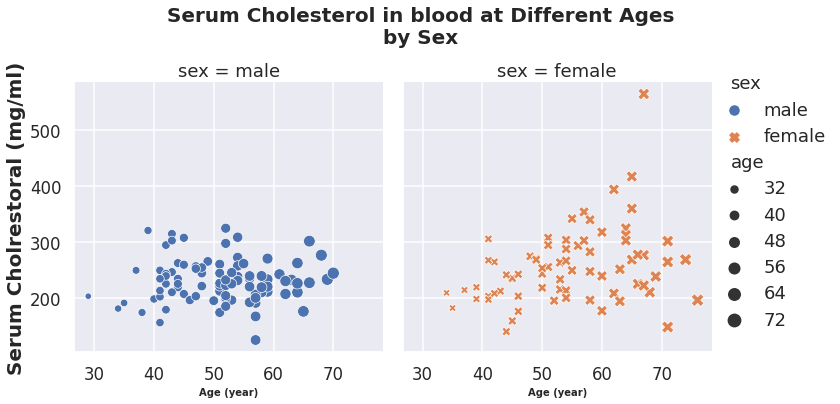

In [ ]:
# Find relation between serum cholesterol and age seperated by sex
fig = plt.figure()
fig.subplots_adjust(top=2)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_context('talk',font_scale=1)
sns.set_style('darkgrid') # white dark whitegrid darkgrid ticks

g = sns.relplot(x='age',y='cholesterol',hue='sex',data=heart,col='sex',style='sex',col_wrap=2,size='age')
g.fig.suptitle('Serum Cholesterol in blood at Different Ages\nby Sex\n',position=(0.5,1.1), fontweight='bold', size=20)
g.set_xlabels("Age (year)",fontweight='bold', size=10)
g.set_ylabels("Serum Cholrestoral (mg/ml)",fontweight='bold', size=20)

สร้าง  data set male สำหรับผู้ที่ป่วยเป็นโรคหัวใจโดยเฉพาะ และเป็นเพศชาย โดยใช้กราฟ Histogram แสดงค่า cholesterol และจำนวนผู้ป่วยเพศชาย
โดยผู้ป่วยเพศชายจำนวนมากมีปริมาณ cholesterol อยู่ที่ 225 mg/dl 

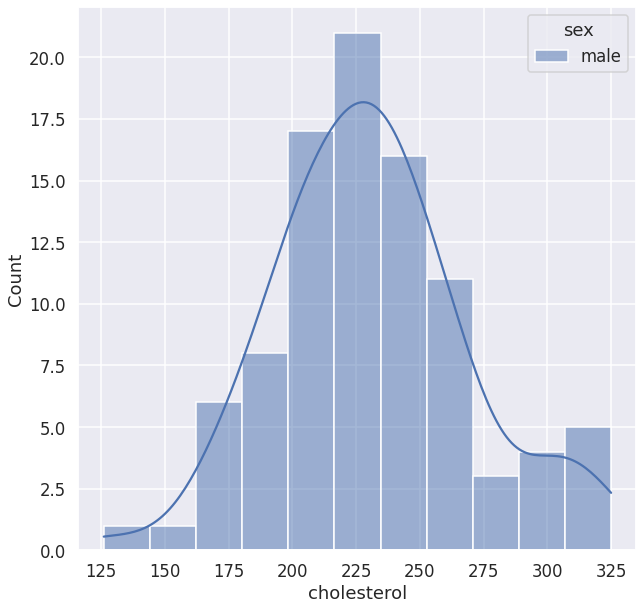

In [ ]:
# We want to see the majority of serum cholesterol in male patients --> we use histogram.

# Create a data set of male patients.
male = heart[heart['sex']=='male']
male
sns.histplot(data=male, x="cholesterol", kde=True,hue='sex')

In [ ]:
male.mean()

age                        50.903226
resting_blood_pressure    129.741935
cholesterol               230.989247
max_hr                    161.903226
st_depression               0.605376
dtype: float64

สร้าง  data set female สำหรับผู้ที่ป่วยเป็นโรคหัวใจโดยเฉพาะ และเป็นเพศหญิง โดยใช้กราฟ Histogram แสดงค่า cholesterol และจำนวนผู้ป่วยเพศหญิง และผู้ป่วยเพศหญิงจำนวนมากมีปริมาณ cholesterol อยู่ที่ 250 mg/dl 

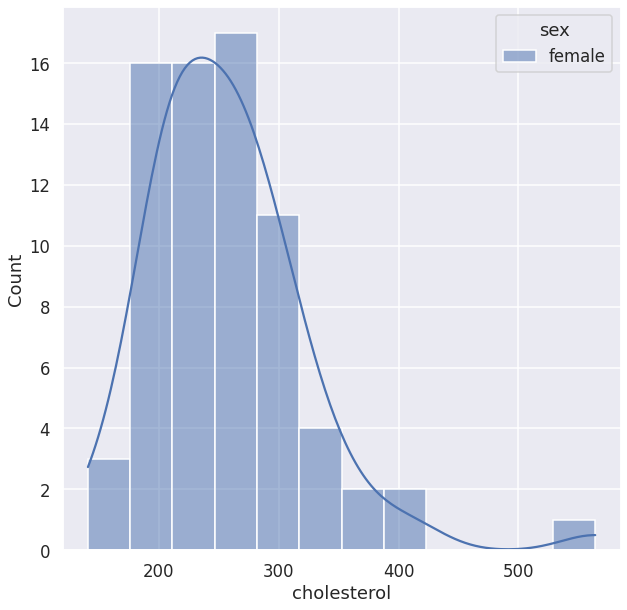

In [ ]:
# We want to see the majority of serum cholestoral in female patients --> we use histogram.

# Create a data set of female patients.
female = heart[heart['sex']=='female']
female
sns.histplot(data=female, x="cholesterol", kde=True,hue='sex')

In [ ]:
female.mean()

age                        54.555556
resting_blood_pressure    128.736111
cholesterol               256.750000
max_hr                    154.027778
st_depression               0.554167
dtype: float64

ใช้กราฟ Histogram  เพื่อทำการเปรียบเทียบข้อมูล cholesterol ระหว่าง เพศชาย และ เพศหญิง



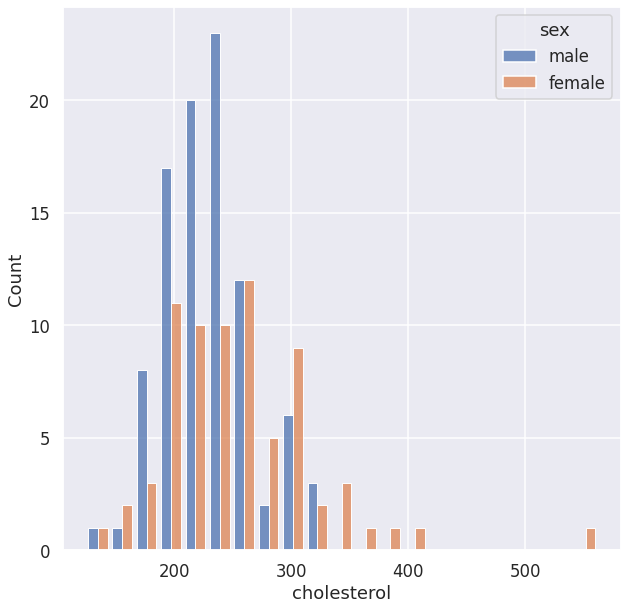

In [ ]:
# Compare data of male and female patients.
sns.histplot(data=heart, x="cholesterol", hue="sex", multiple="dodge", shrink=.8)

จากกราฟข้างต้น สรุปได้ว่า จำนวนผู้ป่วยที่มีปริมาณ cholresterol สูง ส่วนใหญ่เป็นเพศชาย

In [ ]:
# Most of male patients have high serum cholestoral in blood than female patients. Which is why there are more male patients than femal patients.

ใช้กราฟ scatter เพื่อทำการดูความสัมพันธ์ระหว่าง resting blood pressure และ อายุ โดยใช้เพศเป็นตัวแสดง โดยมีเพศหญิง และ เพศชาย

<Figure size 720x720 with 0 Axes>

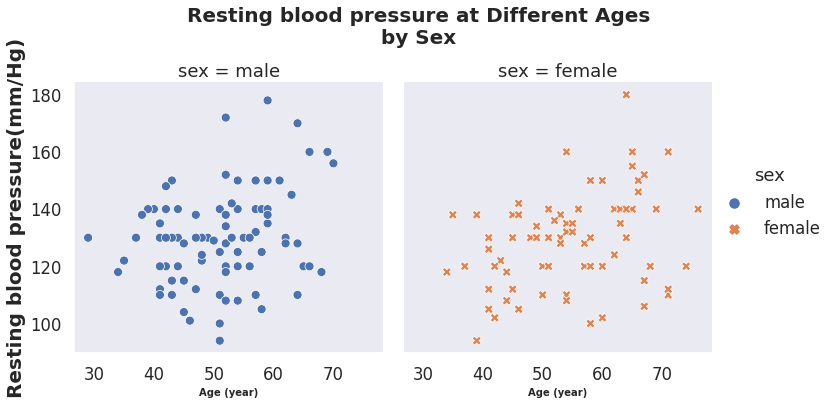

In [ ]:
# Find relation between resting blood pressure and age seperated by sex
fig = plt.figure()
fig.subplots_adjust(top=2)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_context('talk',font_scale=1)
sns.set_style('dark') # white dark whitegrid darkgrid ticks

g = sns.relplot(x='age',y='resting_blood_pressure',hue='sex',data=heart,col='sex',style='sex',col_wrap=2)
g.fig.suptitle('Resting blood pressure at Different Ages\nby Sex\n',position=(0.5,1.1), fontweight='bold', size=20)
g.set_xlabels("Age (year)",fontweight='bold', size=10)
g.set_ylabels("Resting blood pressure(mm/Hg)",fontweight='bold', size=20)

ใช้กราฟ Histogram แสดงค่า resting blood pressure ของจำนวนผู้ป่วยเพศชาย
โดยผู้ป่วยเพศชายจำนวนมามีความดันโลหิต อยู่ที่ 135 mm/Hg 

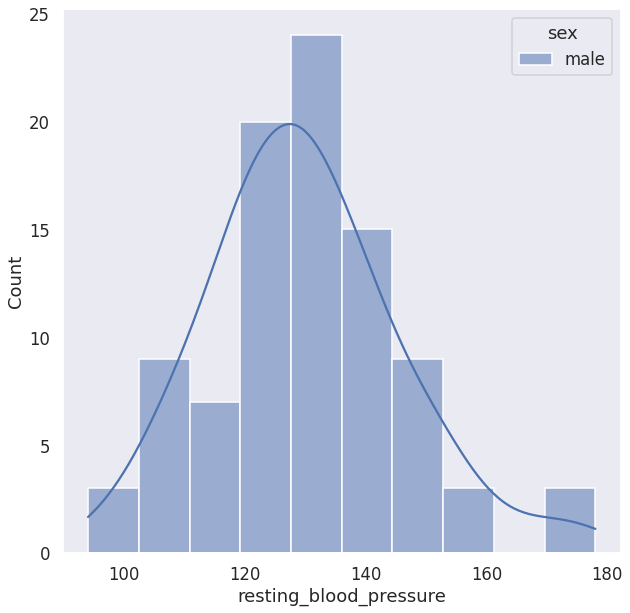

In [ ]:
# We want to see the majority of resting blood pressure in male patients --> we use histogram.

sns.histplot(data=male, x="resting_blood_pressure", kde=True,hue='sex')

ใช้กราฟ Histogram แสดงค่า resting blood pressure ของจำนวนผู้ป่วยเพศหญิง โดยผู้ป่วยเพศหญิงจำนวนมากมีความดันโลหิต อยู่ในช่วง 130-140 mm/Hg 

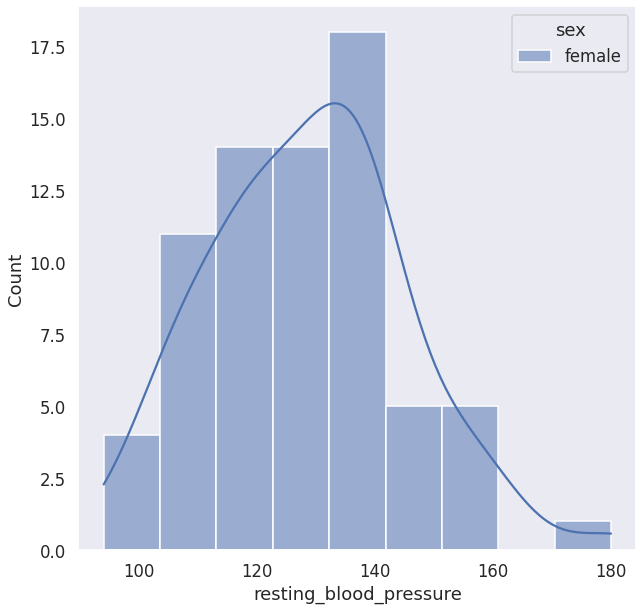

In [ ]:
# We want to see the majority of resting blood pressure in female patients --> we use histogram.

sns.histplot(data=female, x="resting_blood_pressure", kde=True,hue='sex')


ใช้กราฟ Histogram แสดงค่าเปรียบเทียบ resting blood pressure ของจำนวนผู้ป่วยเพศชาย และจำนวนผู้ป่วยเพศหญิง

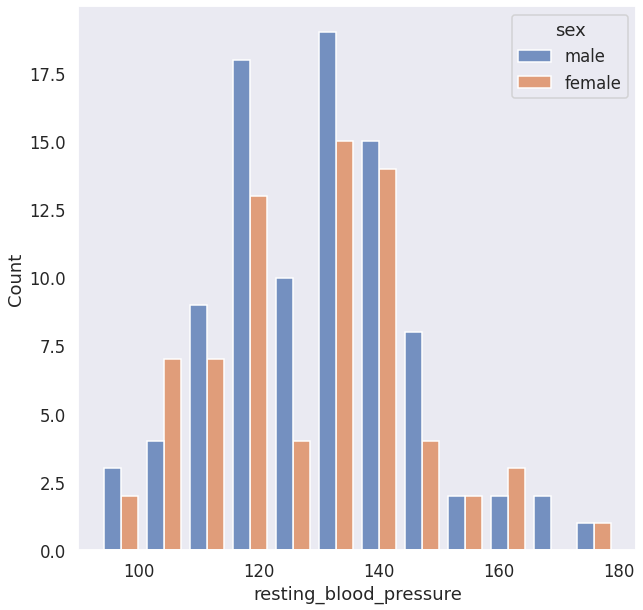

In [ ]:
# Compare data of male and female patients.
sns.histplot(data=heart, x="resting_blood_pressure", hue="sex", multiple="dodge", shrink=.8)

จากกราฟสรุปได้ว่า เมื่อเปรียบเทียบความดันโลหิตระหว่างผู้ป่วยเพศชายและผู้ป่วยเพศหญิง พบว่าผู้ป่วยเพศชายมีความดันโลหิตสูงกว่าเพศหญิง

ใช้กราฟ Histogram แสดงค่า fasting blood sugar ของจำนวนผู้ป่วยเพศชาย ว่ามีปริมาณน้ำตาลในเลือด มากกว่า หรือน้อยกว่า 120 mg/ml

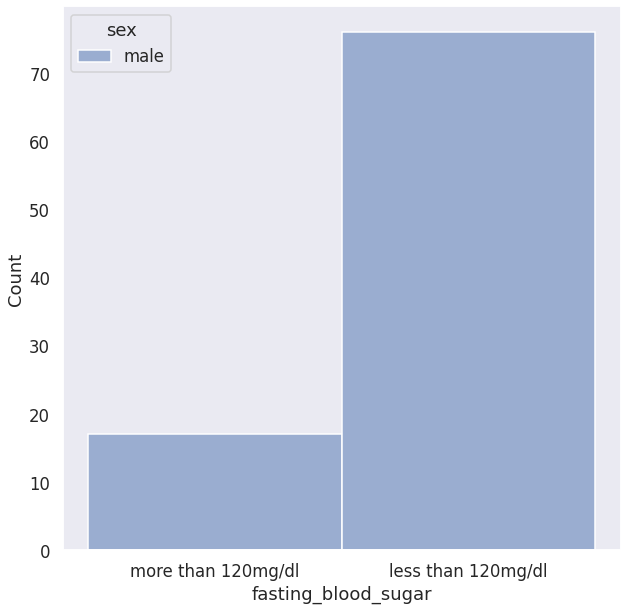

In [ ]:
# Find the mojority of fasting blood sugar in male patients blood.
sns.histplot(data=male, x="fasting_blood_sugar",hue='sex')

ใช้กราฟ Histogram แสดงค่า fasting blood sugar ของจำนวนผู้ป่วยเพศหญิง ว่ามีปริมาณน้ำตาลในเลือด มากกว่า หรือน้อยกว่า 120 mg/ml

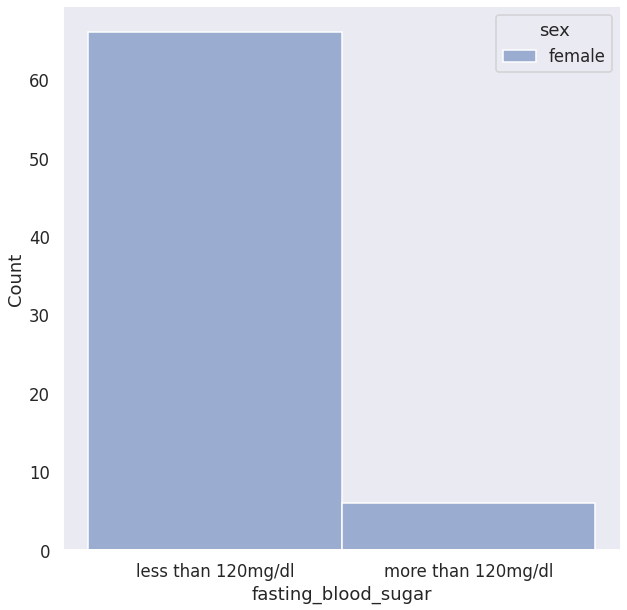

In [ ]:
# Find the mojority of fasting blood sugar in female patients blood.
sns.histplot(data=female, x="fasting_blood_sugar",hue='sex')

ใช้กราฟ Histogram แสดงค่า fasting blood sugar เพื่อเปรียบเทียบ จำนวนผู้ป่วยเพศชายและเพศหญิง ว่ามีปริมาณน้ำตาลในเลือด มากกว่า หรือน้อยกว่า 120 mg/ml โดยผู้ป่วยเพศชายมีจำนวนมากกว่า

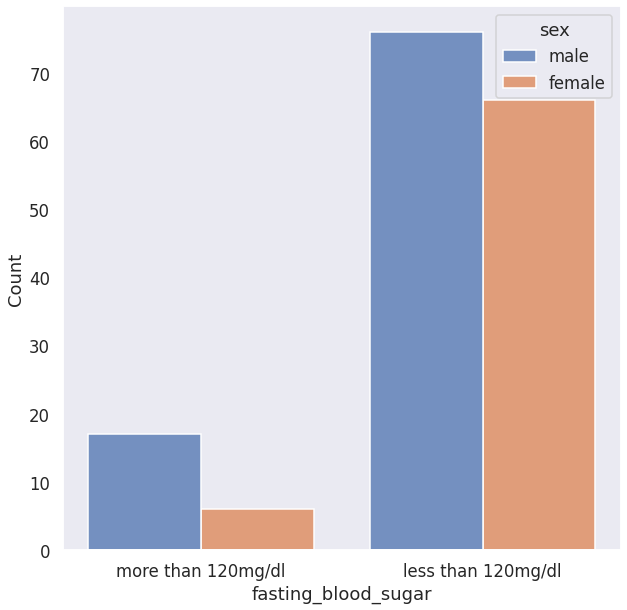

In [ ]:
# Compare data of male and female patients.
sns.histplot(data=heart, x="fasting_blood_sugar", hue="sex", multiple="dodge", shrink=.8)

จากกราฟข้างต้น สรุปได้ว่า ผู้ป่วยที่มีน้ำตาลในเลือดน้อยกว่า 120 mg/dl มีจำนวนมากกว่า  ผู้ป่วยที่มีน้ำตาลในเลือดมากกว่า 120 mg/dl

ใช้กราฟ Histogram แสดงค่า ลักษณะการเจ็บหน้าอก ทั้ง 4 รูปแบบ โดยเปรียบเทียบกับความดันโลหิต





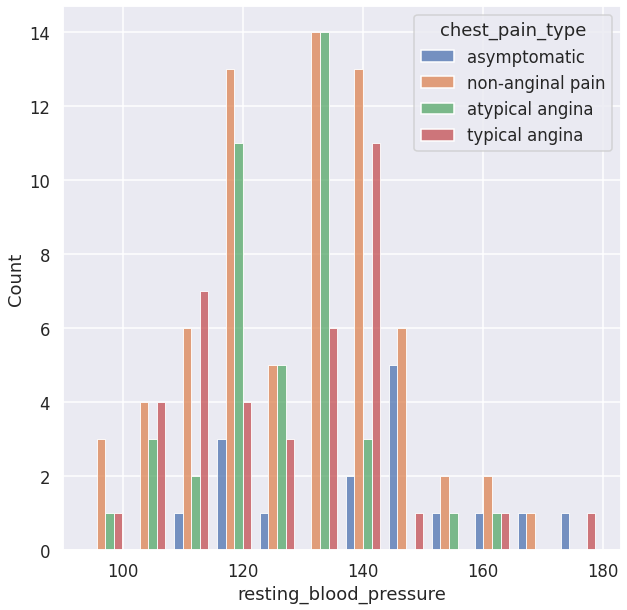

In [ ]:
# We want to find the majority of chest pain type at different resting blood pressure (we thought that if your resting blood pressure is high, you may have an angina.)
sns.set_style('darkgrid')
sns.histplot(data=heart, x="resting_blood_pressure", hue="chest_pain_type", multiple="dodge", shrink=.8)


# most people got non-angina pain and atypical angina at resting blood pressure aroung 135 mmHg.

ใช้กราฟ Histogram แสดงค่า จำนวนเพศชายที่มีลักษณะอาการการเจ็บหน้าอก ทั้ง 4 รูปแบบ 

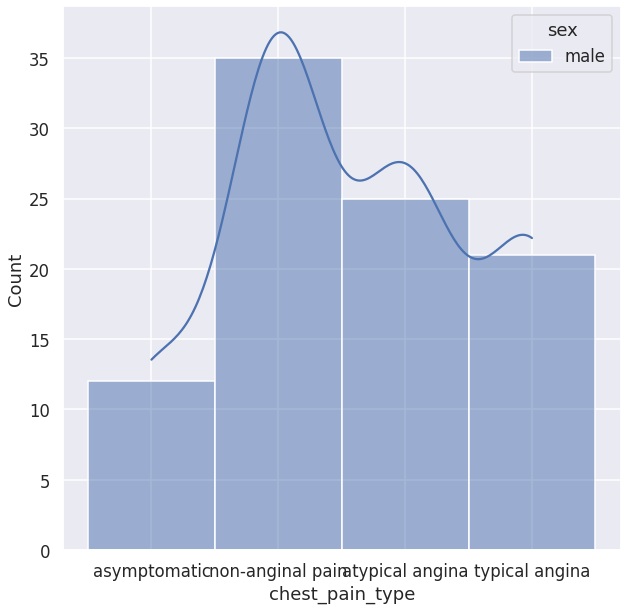

In [ ]:
# We want to see the majority of chest pain type in male patients.
sns.histplot(data=male, x="chest_pain_type", kde=True,hue='sex')

จากกราฟ สรุปได้ว่า เพศชายที่มีการเจ็บหน้าอก แบบ non-anginal pain มีจำนวนมากที่สุด

ใช้กราฟ Histogram แสดงค่า จำนวนเพศหญิงที่มีลักษณะอาการการเจ็บหน้าอก ทั้ง 4 รูปแบบ

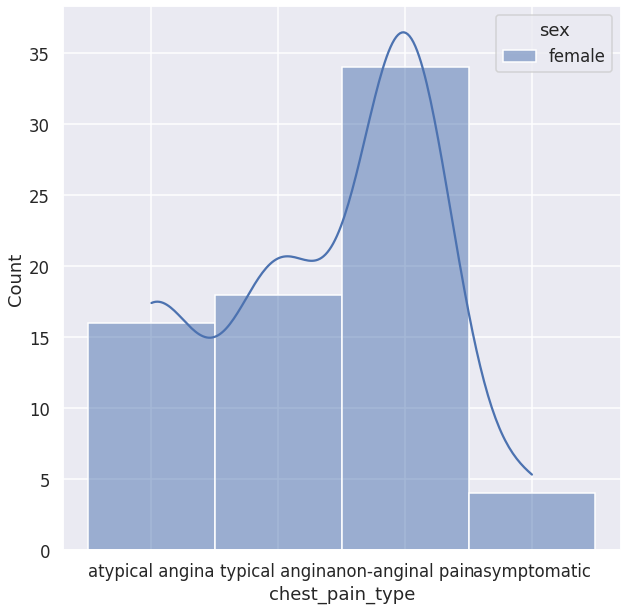

In [ ]:
# We want to see the majority of chest pain type in female patients.
sns.histplot(data=female, x="chest_pain_type", kde=True,hue='sex')

จากกราฟ สรุปได้ว่า เพศหญิงที่มีการเจ็บหน้าอก แบบ non-anginal pain มีจำนวนมากที่สุด

ใช้กราฟ Histogram แสดงค่าเพื่อนำมาเปรียบเทียบ จำนวนเพศชายและเพศหญิงที่มีลักษณะอาการการเจ็บหน้าอก ทั้ง 4 รูปแบบ 

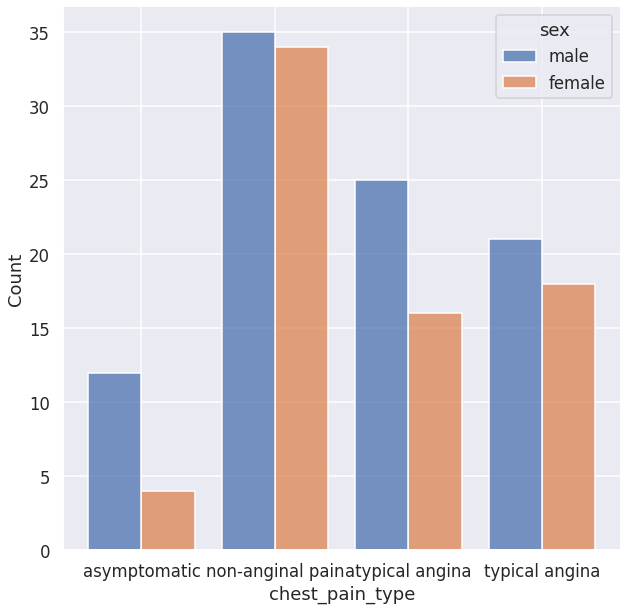

In [ ]:
# Compare the two data above together.
sns.histplot(data=heart, x="chest_pain_type", hue="sex", multiple="dodge", shrink=.8)

# The majority of chest pain type in male & female is non-angina pain.

จากกราฟข้างต้น สรุปได้ว่า  ผู้ป่วยเพศชายและผู้ป่วยเพศหญิงที่มีการเจ็บหน้าอก แบบ non-anginal pain มีจำนวนมากที่สุด

ใช้กราฟ Histogram แสดงการตรวจคลื่นไฟฟ้าหัวใจ ของเพศชาย โดยพบว่า มี จำนวนผู้ที่มีความผิดปกติของ ST segment หรือ T Wave มากกว่า จำนวนผู้ป่วยที่มีคลื่นไฟฟ้าหัวใจปกติ และไม่มีจำนวนผู้ป่วยเพศชายที่มีโอกาสภาวะหัวใจล่างซ้ายพองโต

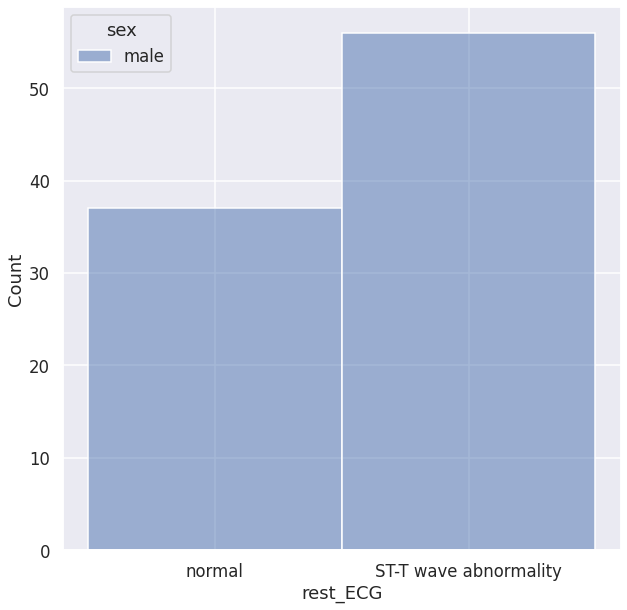

In [ ]:
# We want to see the majority of ECG pain type in male patients.
sns.histplot(data=male, x="rest_ECG",hue='sex')

ใช้กราฟ Histogram แสดงการตรวจคลื่นไฟฟ้าหัวใจ ของเพศหญิง โดยพบว่า มี จำนวนผู้ที่มีความผิดปกติของ ST segment หรือ T Wave มากกว่า จำนวนผู้ป่วยที่มีคลื่นไฟฟ้าหัวใจปกติ และ มี จำนวนผู้ป่วยเพศหญิงที่มีโอกาสภาวะหัวใจล่างซ้ายพองโตอยู่ 1 คน

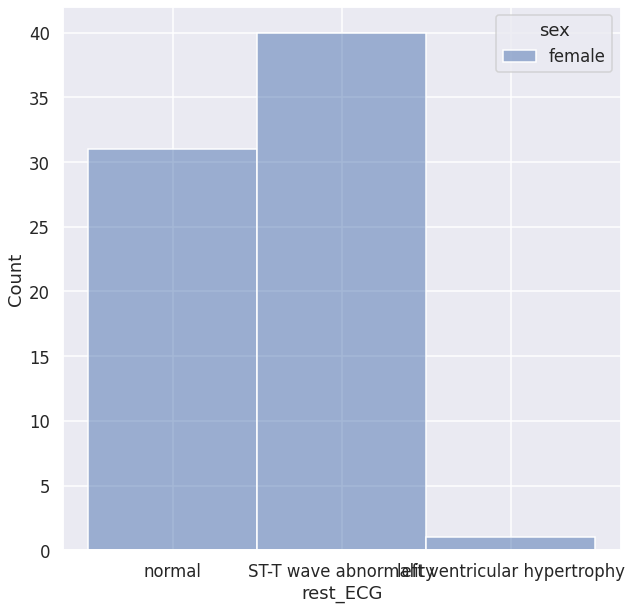

In [ ]:
# We want to see the majority of ECG in female patients.
sns.histplot(data=female, x="rest_ECG",hue='sex')

ใช้กราฟ Histogram แสดงค่าเพื่อนำมาเปรียบเทียบ จำนวนเพศชายและเพศหญิงที่ทำการตรวจคลื่นไฟฟ้าหัวใจ

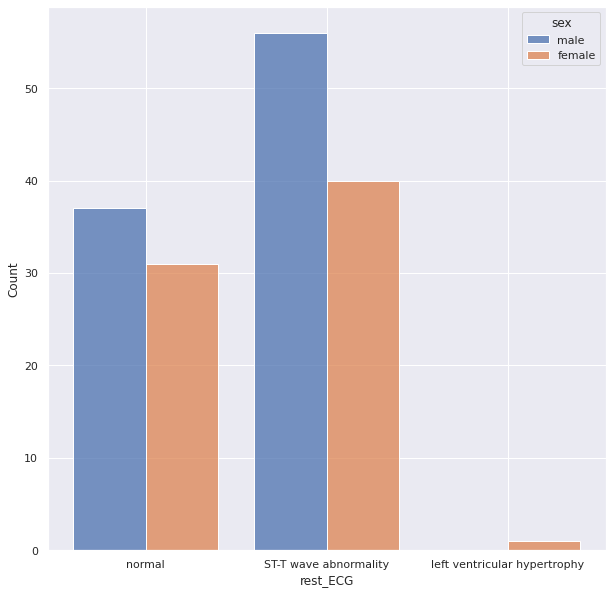

In [ ]:
# Compare the 2 datas.
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot(data=heart, x="rest_ECG", hue="sex", multiple="dodge", shrink=.8)

จากกราฟข้างต้น สรุปได้ว่า  ผู้ป่วยเพศชายและผู้ป่วยเพศหญิง มีจำนวนผู้ที่มีความผิดปกติของ ST segment หรือ T Wave มากที่สุด  จำนวนผู้ป่วยที่มีคลื่นไฟฟ้าหัวใจปกติ รองลงมา และ มี จำนวนผู้ป่วยเพศหญิงที่มีโอกาสภาวะหัวใจล่างซ้ายพองโตอยู่ 1 คน

ใช้ กราฟ scatter แสดงความสัมพันธ์ระหว่าง fasting blood sugar,resting blood pressure และ ST depression โดยคาดว่า ถ้าน้ำตาลในเลือดและความดันโลหิตสูง อาจทำให้หัวใจทำงานหนัก และ หัวใจทำงานผิดปกติ 

<Figure size 720x720 with 0 Axes>

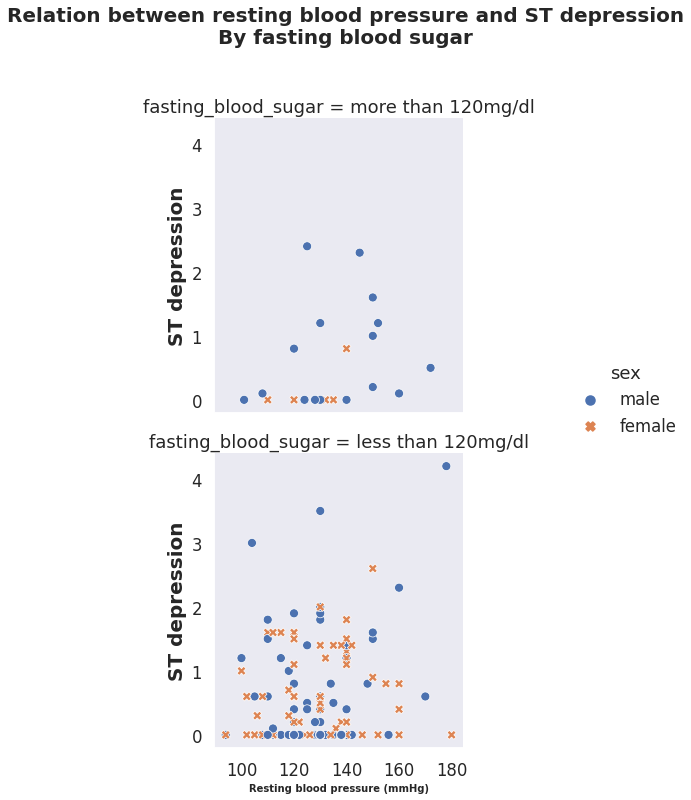

In [ ]:
# We want to find out what is the realation between fasting blood sugar,resting blood pressure and ST depression (we thougth that if your fasting blood sugar and resting blood sugar are 
# greater than 120 mg/ml,your heart may work harder and your heart may work abnormally)
fig = plt.figure()
fig.subplots_adjust(top=2)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_context('talk',font_scale=1)
sns.set_style('dark')
g = sns.relplot(x='resting_blood_pressure',y='st_depression',hue='sex',data=heart,col='fasting_blood_sugar',style='sex',col_wrap=1)
g.fig.suptitle('Relation between resting blood pressure and ST depression\nBy fasting blood sugar\n',position=(0.5,1.1), fontweight='bold', size=20)
g.set_xlabels("Resting blood pressure (mmHg)",fontweight='bold', size=10)
g.set_ylabels("ST depression",fontweight='bold', size=20)

จากกราฟข้างต้นสรุปได้ว่า ความดันโลหิต และ น้ำตาลในเลือด ไม่ส่งผลต่อ ST depression เห็นจากจากหนึ่งในผู้ป่วย มีความดันโลหิตสูงประมาณ 175 mmHg เเละ น้ำตาลในเลือดมีปริมาณน้อยกว่า 120 mg/dl และการตรวจคลื่นไฟฟ้าหัวใจเป็นปกติ

In [ ]:
# From the graph above, the conclusion is your resting blood pressure and your fasting blood sugar are not matter to ST depression.
# One of the patients got resting blood pressure at around 175 mmHg and his fasting blood sugar is lower than 120 mg/m=dl. His ECG is normal. 

ใช้ กราฟ scatter แสดงความสัมพันธ์ระหว่าง ปริมาณ cholesterol ในเลือด , อัตราการเต้นของหัวใจท่สูงที่สุด และ การออกกำลังกายที่ทำให้เกิดอาการเจ็บหน้าอก โดยใช้เพศเป็นตัวแสดงผล โดยคาดว่า ถ้าปริมาณ cholesterol สูง และ อัตราการเต้นของหัวใจสูง และเคยมีอาการเจ็บหน้าอกขณะออกกำลังกาย จะมีโอกาสเป็นโรคหัวใจ

<Figure size 720x720 with 0 Axes>

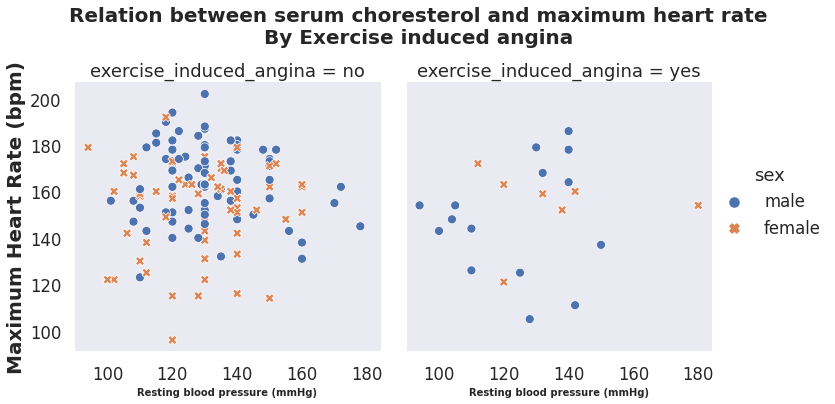

In [ ]:
# We want to see the realtion of serum cholesterol in blood, maximum heart rate and exercise induced angina.
# We thought that if your serum chorestoral and maximum heart rate is high and you experienced angina by working out, you may have a heart disease.
fig = plt.figure()
fig.subplots_adjust(top=2)
sns.set(rc={'figure.figsize':(20,20)})
sns.set_context('talk',font_scale=1)
sns.set_style('dark')
g = sns.relplot(x='resting_blood_pressure',y='max_hr',hue='sex',data=heart,col='exercise_induced_angina',style='sex',col_wrap=2)
g.fig.suptitle('Relation between serum choresterol and maximum heart rate\nBy Exercise induced angina\n',position=(0.5,1.1), fontweight='bold', size=20)
g.set_xlabels("Resting blood pressure (mmHg)",fontweight='bold', size=10)
g.set_ylabels("Maximum Heart Rate (bpm)",fontweight='bold', size=20)

จากกราฟข้างต้น สุรปได้ว่า ผู้ป่วยที่เป็นโรคหัวใจส่วนใหญ่ที่มีปริมาณ cholesterol สูง และ อัตราการเต้นของหัวใจสูง ไม่มีอาการเจ็บหน้าอกขณะออกกำลังกาย ดังนั้น เเสดงให้เห็นว่า การเจ็บหน้าอกขณะออกกำลังกายไม่ใช่ปัจจัยที่ทำให้เป็นโรคหัวใจ

In [ ]:
# From the graph above, the conclusion is the majority of patients didn't got angina by working out.
# So it is show that exercise that caused you an angina is not the factor of heart disease.

ได้มีการคาดว่า หากมีปริมาณ cholesterol สูง,ความดันโลหิตสูง และคลื่นไฟฟ้าหัวใจไม่ปกติ อาจมีโอกาสเป็นโรคหัวใจ โดยสร้าง กราฟ scatter เพื่อแสดงความสัมพันธ์ของปัจจัยทั้ง 3 อย่าง

<Figure size 1440x1440 with 0 Axes>

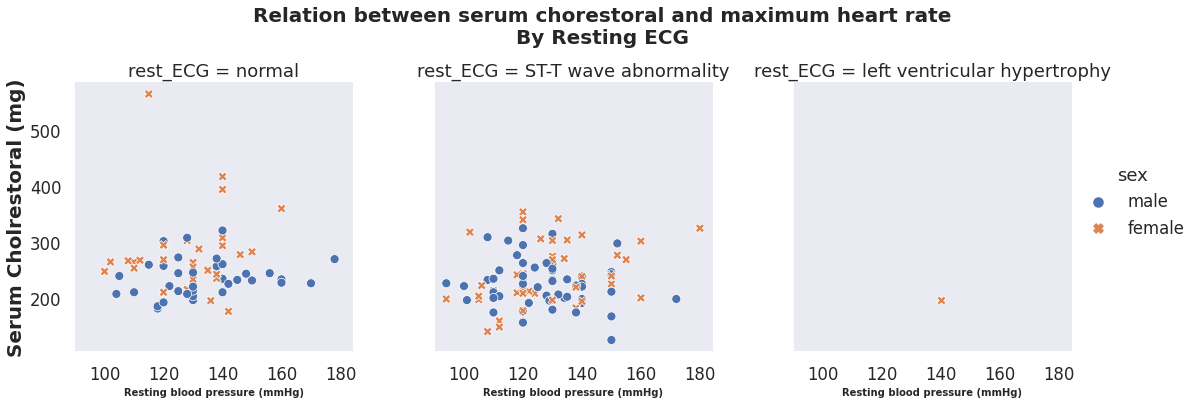

In [ ]:
# We thought that if your serum chorestorla is high, your resting blood pressure is high and your ECG is abnormal, you may got a heart disease.
# We create this graph to let we see the relation of these three factors.
fig = plt.figure()
fig.subplots_adjust(top=2)
sns.set(rc={'figure.figsize':(20,20)})
sns.set_context('talk',font_scale=1)
sns.set_style('dark')
g = sns.relplot(x='resting_blood_pressure',y='cholesterol',hue='sex',data=heart,col='rest_ECG',style='sex',col_wrap=3)
g.fig.suptitle('Relation between serum chorestoral and maximum heart rate\nBy Resting ECG\n',position=(0.5,1.1), fontweight='bold', size=20)
g.set_xlabels("Resting blood pressure (mmHg)",fontweight='bold', size=10)
g.set_ylabels("Serum Cholrestoral (mg)",fontweight='bold', size=20)

จากกราฟข้างต้นสรุปได้ว่า การที่คลื่นไฟฟ้าหัวใจปกติหรือผิดปกติ ไม่ส่งผลต่อการเป็นโรคหัวใจ หากไม่มีภาวะความดันโลหิตสูง และ cholesterol สูงร่วมด้วย

In [ ]:
# The conclusion is it's not matter if your ECG is normal or abnormal, you may not have a heart disease eventhough your resting blood pressure and serum chorestoral is high.

ได้มีการคาดว่า หากมีปริมาณ cholesterol สูง,ความดันโลหิตสูง และปริมาณน้ำตาลในเลือดมากกว่า 120 mmHg อาจมีโอกาสเป็นโรคหัวใจ โดยสร้าง กราฟ scatter เพื่อแสดงความสัมพันธ์ของปัจจัยทั้ง 3 อย่าง



<Figure size 1440x1440 with 0 Axes>

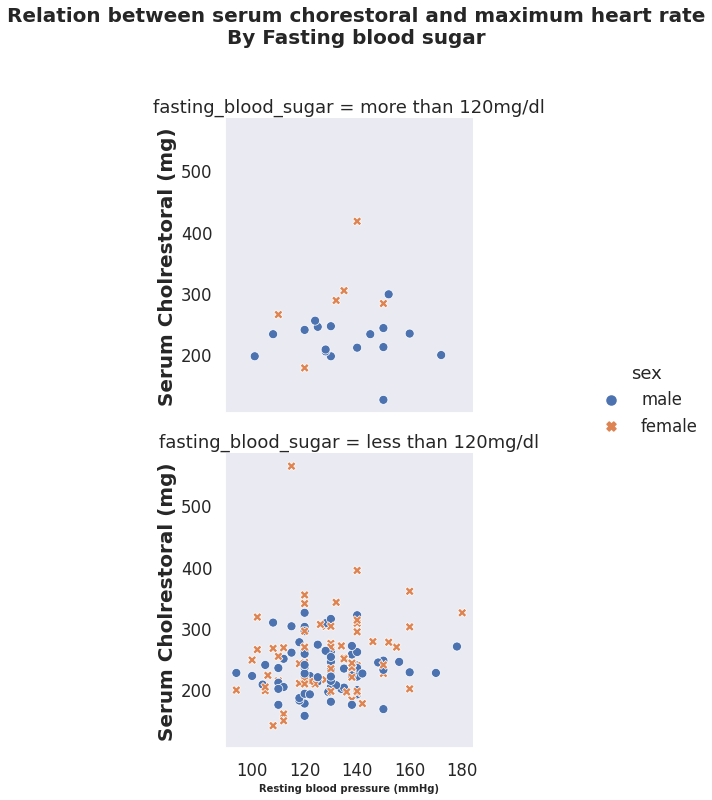

In [ ]:
# We thought that if your serum chorestorla is high, your resting blood pressure is high and your fasting blood sugar is > 120 mmHg, you may got a heart disease.
# We create this graph to let we see the relation of these three factors.
fig = plt.figure()
fig.subplots_adjust(top=2)
sns.set(rc={'figure.figsize':(20,20)})
sns.set_context('talk',font_scale=1)
sns.set_style('dark')
g = sns.relplot(x='resting_blood_pressure',y='cholesterol',hue='sex',data=heart,col='fasting_blood_sugar',style='sex',col_wrap=1)
g.fig.suptitle('Relation between serum chorestoral and maximum heart rate\nBy Fasting blood sugar\n',position=(0.5,1.1), fontweight='bold', size=20)
g.set_xlabels("Resting blood pressure (mmHg)",fontweight='bold', size=10)
g.set_ylabels("Serum Cholrestoral (mg)",fontweight='bold', size=20)

In [ ]:
# The conclusion is it's not matter if your fasting blood sugar is normal or abnormal, you may not have a heart disease eventhough your resting blood pressure and serum chorestoral is high.

จากกราฟข้างต้นสรุปได้ว่า การที่ปริมาณน้ำตาลในเลือดมากกว่าหรือน้อยกว่า 120 mmHg ไม่ส่งผลต่อการเป็นโรคหัวใจ หากไม่มีภาวะความดันโลหิตสูง และ cholesterol สูงร่วมด้วย

In [ ]:
from sklearn.model_selection import train_test_split

ทำการใช้ machine learning เพื่อทำนาย การเป็นโรคหัวใจจากข้อมูล โดยมีข้อมูลทั้งหมด 303 คน เป็นผู้ป่วยที่เป็นโรคหัวใจ 165 คน และ ผู้ที่ไม่เป็นโรคหัวใจ 138 คน ซึ่งไม่ได้นำผู้ที่ไม่ได้เป็นโรคหัวใจมาทำการคำนวณ

In [ ]:
# We use ML to predict the heart disease from the data.
# Non-heart disease patients included.
# There are 165 heart disease patients in this dataset.
# Thus, 303 - 165 = 138 of non-heart disease patients.
machine = pd.read_csv("/content/drive/My Drive/Classroom/CS245_63-1 870001_650001/data/heart.csv")
machine

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Drop columns : thal , ca and slope -> not use
machine = machine.drop(['thal'],axis=1)
machine = machine.drop(['ca'],axis=1)
machine = machine.drop(['slope'],axis=1)
machine

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,0
299,45,1,3,110,264,0,1,132,0,1.2,0
300,68,1,0,144,193,1,1,141,0,3.4,0
301,57,1,0,130,131,0,1,115,1,1.2,0


In [ ]:
# X = Information that Machine will use to learn who got a Heart disease.
# Y = Data that show who got a heart disease.
array = machine.values
x = array[:,0:10]
y = array[:,10]
X_train,X_valid,Y_train,Y_valid = train_test_split(x,y,test_size=0.20,random_state=1)
X_valid

array([[6.20e+01, 0.00e+00, 0.00e+00, 1.60e+02, 1.64e+02, 0.00e+00,
        0.00e+00, 1.45e+02, 0.00e+00, 6.20e+00],
       [5.60e+01, 1.00e+00, 1.00e+00, 1.30e+02, 2.21e+02, 0.00e+00,
        0.00e+00, 1.63e+02, 0.00e+00, 0.00e+00],
       [4.80e+01, 1.00e+00, 0.00e+00, 1.30e+02, 2.56e+02, 1.00e+00,
        0.00e+00, 1.50e+02, 1.00e+00, 0.00e+00],
       [6.00e+01, 1.00e+00, 0.00e+00, 1.30e+02, 2.06e+02, 0.00e+00,
        0.00e+00, 1.32e+02, 1.00e+00, 2.40e+00],
       [5.00e+01, 1.00e+00, 0.00e+00, 1.50e+02, 2.43e+02, 0.00e+00,
        0.00e+00, 1.28e+02, 0.00e+00, 2.60e+00],
       [6.30e+01, 1.00e+00, 0.00e+00, 1.40e+02, 1.87e+02, 0.00e+00,
        0.00e+00, 1.44e+02, 1.00e+00, 4.00e+00],
       [5.60e+01, 1.00e+00, 0.00e+00, 1.30e+02, 2.83e+02, 1.00e+00,
        0.00e+00, 1.03e+02, 1.00e+00, 1.60e+00],
       [4.60e+01, 0.00e+00, 0.00e+00, 1.38e+02, 2.43e+02, 0.00e+00,
        0.00e+00, 1.52e+02, 1.00e+00, 0.00e+00],
       [6.00e+01, 1.00e+00, 0.00e+00, 1.45e+02, 2.82e+02, 0.00e+

ทำการนำ ML Supervised Classification algorithms มาใช้เพื่อที่จะหา model ที่ดีที่สุดในการคาดการณ์ (เปรียบเสมือนการ สอนให้ machine เรียนรู้ว่าต้องจัดการข้อมูลอย่างไร )


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.lda import LDA

# 3. Build the models 
# Create an array of all ML Supervised Classification algorithms to be used
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  # We set the random seed via the 'random_state' argument to a fixed number e.g. random_state=1.
  # This is to ensure that each algorithm is evaluated on the same splits of the training dataset.
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 
  # We are using the metric of 'accuracy' to evaluate models.
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.822000 (0.059258)
LDA: 0.842667 (0.055669)
KNN: 0.651667 (0.095948)
CART: 0.747500 (0.068740)
NB: 0.822333 (0.055363)
SVM: 0.549500 (0.022950)


จากผลลัพธ์ข้างต้น จะเห็นได้ว่า LDA Model คือโมเดลที่ดีที่สุดในการทำนายผล เพราะว่าค่า accuracy ของ LDA มีค่ามากที่สุด


In [ ]:
# The best model for our dataset is Linear Discriminant Analysis

ทำการคาดการณ์ผลจากชุดข้อมูลที่ใช้ทดสอบ

In [ ]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_valid) # 30 rows randomly extracted earlier from the data set
print(predictions)

[0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.]


วัดผลการทำนาย จาก 20% ของ ชุดข้อมูลทั้งที่เป็นโรคหัวใจและไม่เป็นโรคหัวใจทั้งหมด โดย 20% ของ 303ข้อมูล มีค่าเท่ากับ 61ข้อมูล และ
ให้ 0 มีค่าเป็น ไม่เป็นโรคหัวใจ และ 1 มีค่าเป็น เป็นโรคหัวใจ

In [ ]:
# Evaluate predictions
# 20% of test data = (20 * 303)/100 = 60.6 = 61 datas


# Thus 0 == 'non-heart disease' 1 == 'heart disease'
print(accuracy_score(Y_valid, predictions))
print()
print(confusion_matrix(Y_valid, predictions))
print()
print(classification_report(Y_valid, predictions))

0.7049180327868853

[[19 11]
 [ 7 24]]

              precision    recall  f1-score   support

         0.0       0.73      0.63      0.68        30
         1.0       0.69      0.77      0.73        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



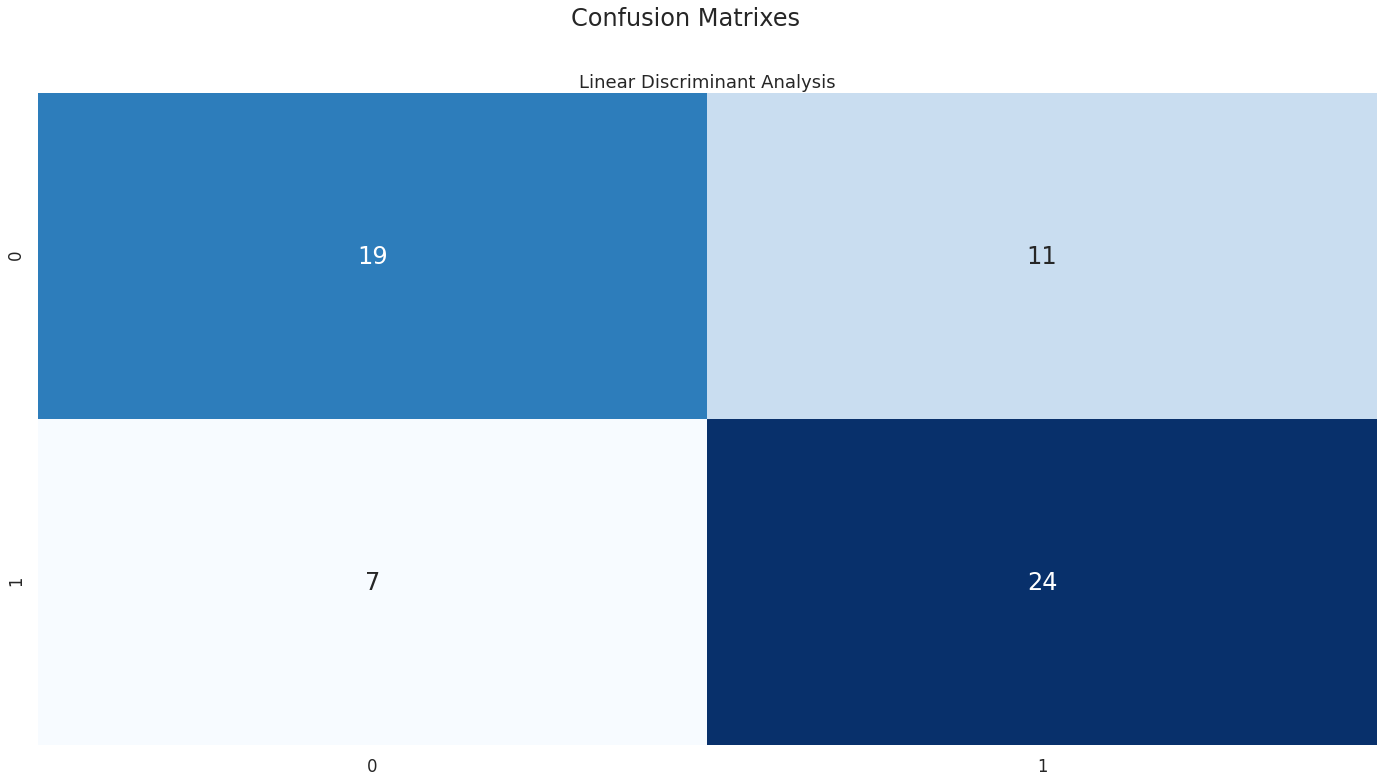

In [ ]:
cm_lda = confusion_matrix(Y_valid, predictions)
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplot(1,1,1)
plt.title('Linear Discriminant Analysis')
sns.heatmap(cm_lda,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
# 1 == 'yes' and 0 == 'no' (to avoid misunderstanding)

จากตารางข้างต้น สรุปได้ว่า True Positive มีค่าเท่ากับ 19 , False Negative มีค่าเป็น 11 , False Positive มีค่าเป็น 7 และ True Negative มีค่าเป็น 24
และ machine learning มีประสิทธิภาพค่อนข้างดี เนื่องจากค่า accuracy มีค่า 0.7049180327868853 หรือ ประมาณ 0.7